In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
dataset = datasets.fetch_california_housing()

In [3]:
X = pd.DataFrame(dataset["data"], columns=dataset["feature_names"])
y = dataset["target"]
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBRegressor()
model = model.fit(x_train, y_train)

In [5]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"RMSE: {np.sqrt(mse):.4f}")

RMSE: 0.4739


In [6]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test, y_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


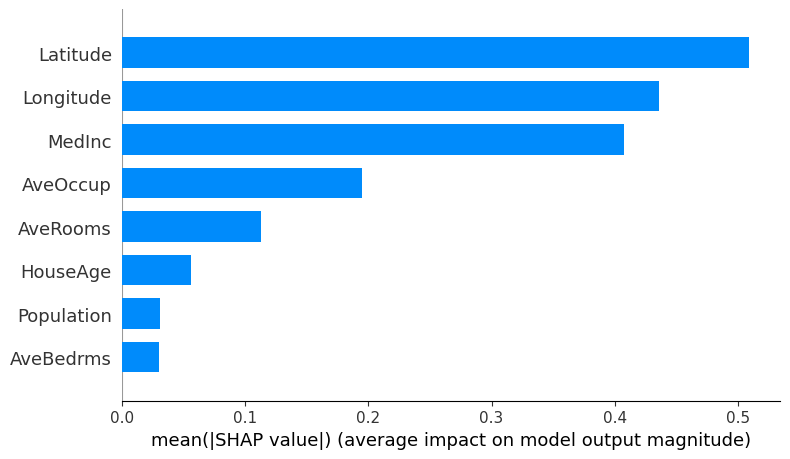

In [7]:
shap.summary_plot(shap_values, x_test, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


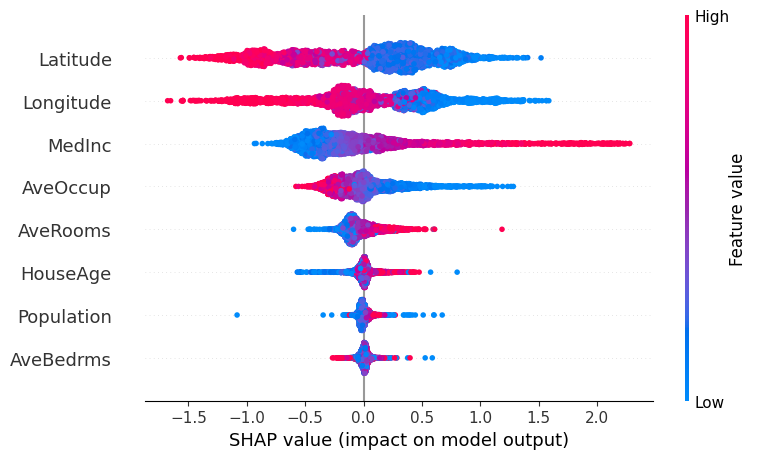

In [8]:
shap.summary_plot(shap_values, x_test)

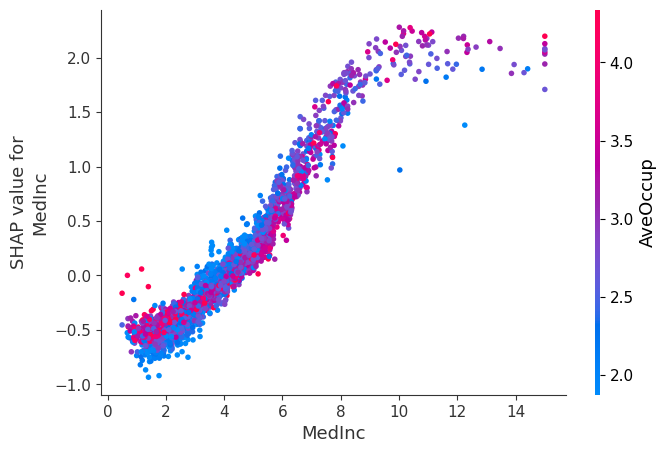

In [9]:
shap.dependence_plot(0, shap_values, x_test)

In [10]:
from IPython.display import HTML


shap.initjs()

def white_force_plot(*args, **kwargs):
    """Wrapper aroung force_plot to correctly plot on dark backgrounds."""
    force_plot = shap.force_plot(*args, **kwargs)
    return HTML(f"<div style='background-color:white;'>{shap.getjs() + force_plot.html()}</div>")

In [11]:
white_force_plot(explainer.expected_value, shap_values[42], x_test.iloc[42])

In [12]:
import random

samples = np.array(random.sample(range(len(x_test)), 1000))

white_force_plot(explainer.expected_value, shap_values[samples], x_test.iloc[samples], plot_cmap="seaborn.dark")

In [13]:
shap_interaction_values = explainer.shap_interaction_values(x_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


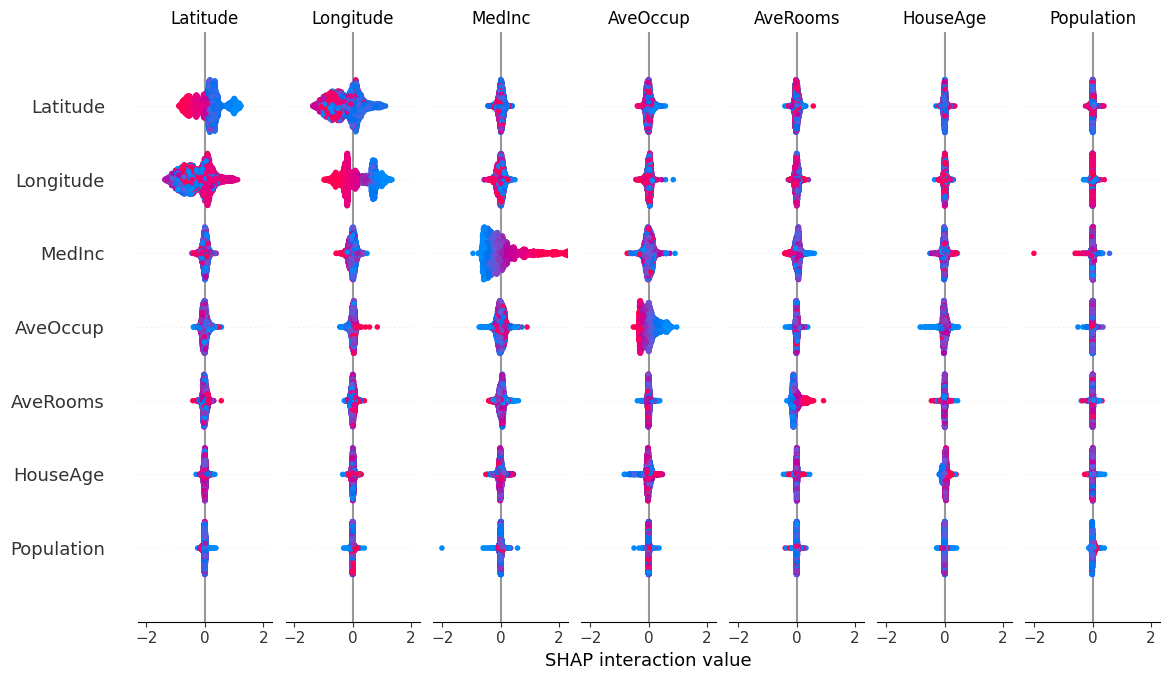

In [14]:
shap.summary_plot(shap_interaction_values, x_test)

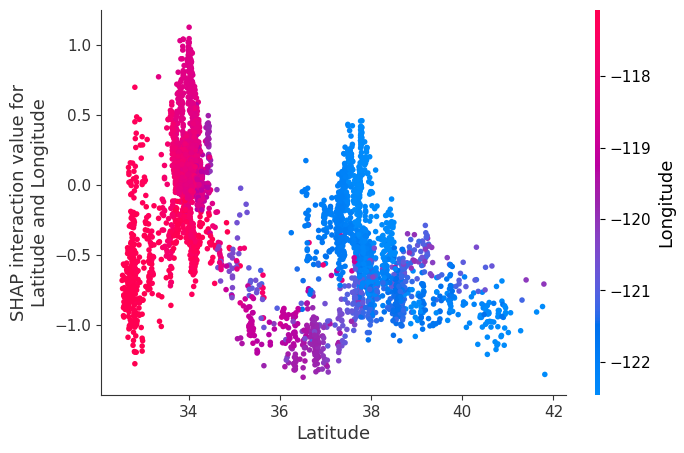

In [15]:
shap.dependence_plot(("Latitude", "Longitude"), shap_interaction_values, x_test)